In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('all_stocks_5yr.csv')

# Print unique values in the 'name' column
print(df['Name'].unique())

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [2]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [18]:
import pandas as pd

# Load datasets
stocks_df = pd.read_csv("all_stocks_5yr.csv")
selected_df = pd.read_csv("selected_company_sample.csv")

# Filter stock data for selected companies
selected_symbols = selected_df['Symbol'].unique()
filtered_df = stocks_df[stocks_df['Name'].isin(selected_symbols)].copy()

# Convert 'date' to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Pivot to get wide-format price data
price_data = filtered_df.pivot(index='date', columns='Name', values='close')

# Drop any rows with missing values (to ensure clean returns data)
price_data = price_data.dropna()

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Display structure
print("Price Data (head):")
print(price_data.head())

print("\nDaily Returns (head):")
print(returns.head())


Price Data (head):
Name         AVGO    AXP     BAC     CB     CMG     EA   EBAY   GRMN     IBM  \
date                                                                           
2013-02-08  35.32  61.80  11.760  86.20  320.72  17.37  56.62  38.08  201.68   
2013-02-11  35.40  61.98  11.860  86.41  323.56  17.41  56.41  37.87  200.16   
2013-02-12  35.14  62.20  12.245  86.82  322.51  17.54  56.78  37.68  200.04   
2013-02-13  35.17  62.10  12.170  86.66  317.01  17.17  57.05  38.56  200.09   
2013-02-14  35.64  62.34  12.130  86.44  317.72  17.15  56.83  38.97  199.65   

Name           IT    LEG     MHK     MS    ORLY     XL  
date                                                    
2013-02-08  49.75  29.74  103.11  23.32  101.57  28.24  
2013-02-11  49.49  29.58  104.84  23.28  102.40  28.31  
2013-02-12  49.37  29.90  106.38  23.63  101.56  28.41  
2013-02-13  48.90  30.24  107.57  23.63  102.00  28.42  
2013-02-14  48.53  30.60  107.05  23.83  101.68  28.22  

Daily Returns (head)

In [20]:
pip install cvxpy

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/887.3 kB ? eta -:--:--
   ---------------------------------------- 887.3/887.3 kB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   ----------- ---------------------------- 2.1/7.4 MB 10.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.7/7.4 MB 8.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.5/7.4 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 7.4/7.4 MB 9.2 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [scs]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]


Optimal Weights:
AVGO: 0.0000
AXP: 0.0442
BAC: -0.0000
CB: 0.2129
CMG: 0.0792
EA: 0.0370
EBAY: 0.0302
GRMN: 0.0512
IBM: 0.1921
IT: 0.0740
LEG: 0.0783
MHK: -0.0000
MS: -0.0000
ORLY: 0.1246
XL: 0.0763

Expected Annual Return: 10.49%
Expected Annual Volatility: 12.57%


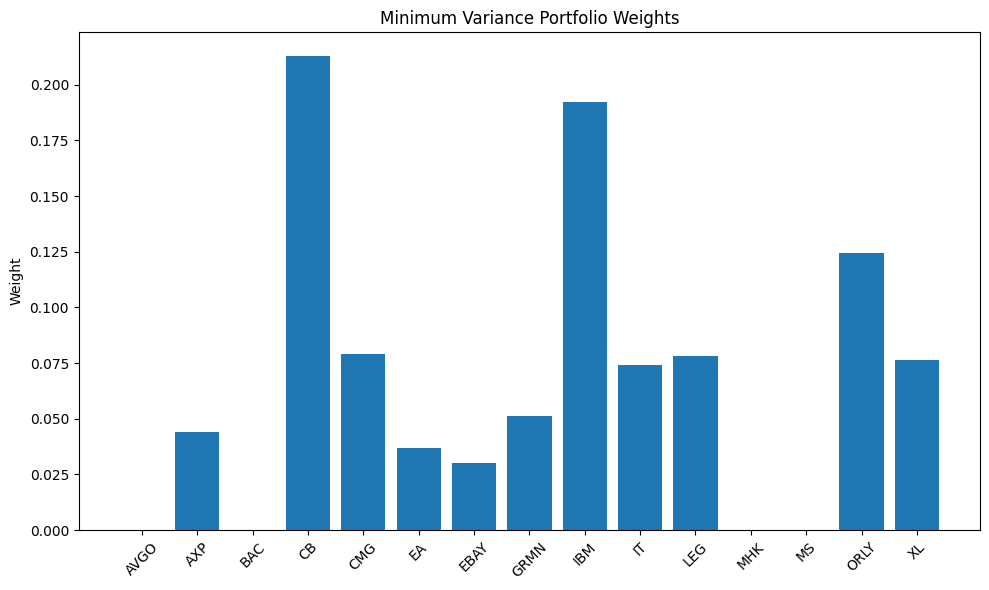

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# --- Step 1: Assign each stock to a sector
sector_map = selected_df.set_index("Symbol")["Sector"].to_dict()
sectors = list(set(sector_map.values()))
sector_weights = {sector: 1 / len(sectors) for sector in sectors}  # Equal sector weights

# --- Step 2: Group symbols by sector
sector_groups = {sector: selected_df[selected_df['Sector'] == sector]['Symbol'].tolist() for sector in sectors}

# --- Step 3: Prepare returns matrix
symbols = returns.columns.tolist()
returns_matrix = returns[symbols].values
mean_returns = returns.mean().values
cov_matrix = returns.cov().values
n = len(symbols)

# --- Step 4: Optimization variables
weights = cp.Variable(n)
portfolio_return = mean_returns @ weights
portfolio_risk = cp.quad_form(weights, cov_matrix)

# --- Step 5: Sector constraints
constraints = [
    cp.sum(weights) == 1,
    weights >= 0
]

for sector, symbols_in_sector in sector_groups.items():
    idxs = [symbols.index(sym) for sym in symbols_in_sector]
    sector_sum = cp.sum(cp.hstack([weights[i] for i in idxs]))
    constraints.append(sector_sum == sector_weights[sector])

# --- Step 6: Solve for minimum variance portfolio
problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
problem.solve()

# --- Step 7: Results
opt_weights = weights.value
opt_return = mean_returns @ opt_weights
opt_volatility = np.sqrt(opt_weights.T @ cov_matrix @ opt_weights)

# Print results
print("Optimal Weights:")
for sym, w in zip(symbols, opt_weights):
    print(f"{sym}: {w:.4f}")

print(f"\nExpected Annual Return: {opt_return * 252:.2%}")
print(f"Expected Annual Volatility: {opt_volatility * np.sqrt(252):.2%}")

# Plot weights
plt.figure(figsize=(10,6))
plt.bar(symbols, opt_weights)
plt.title("Minimum Variance Portfolio Weights")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


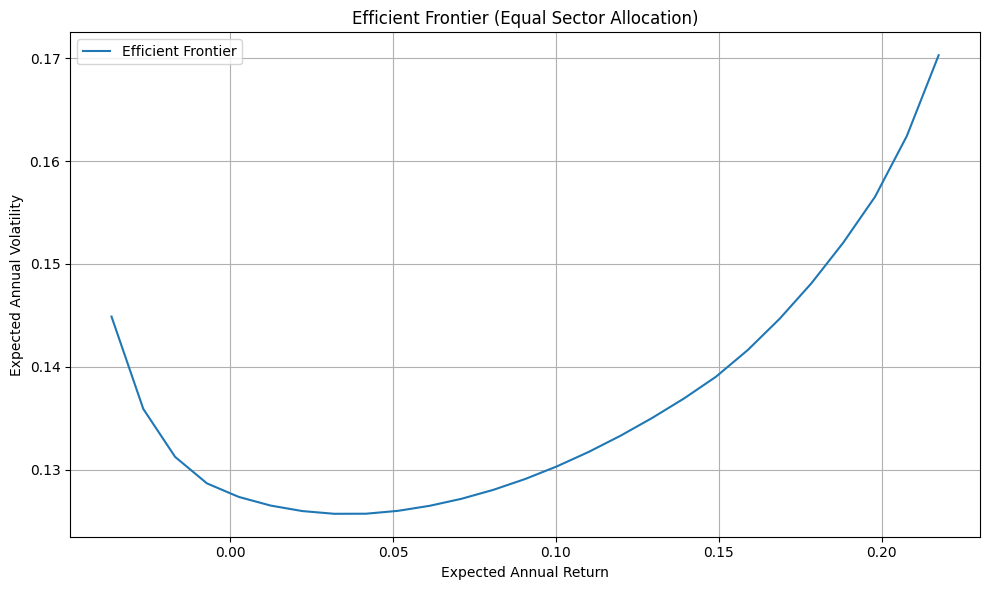

In [22]:
# --- Efficient Frontier Construction ---
target_returns = np.linspace(min(mean_returns), max(mean_returns), 50)
efficient_risks = []
efficient_weights = []

for r in target_returns:
    # Define new optimization problem for each target return
    weights_var = cp.Variable(n)
    constraints = [
        cp.sum(weights_var) == 1,
        weights_var >= 0,
        mean_returns @ weights_var == r
    ]

    # Sector allocation constraints
    for sector, symbols_in_sector in sector_groups.items():
        idxs = [symbols.index(sym) for sym in symbols_in_sector]
        sector_sum = cp.sum(cp.hstack([weights_var[i] for i in idxs]))
        constraints.append(sector_sum == sector_weights[sector])

    risk = cp.quad_form(weights_var, cov_matrix)
    prob = cp.Problem(cp.Minimize(risk), constraints)

    try:
        prob.solve()
        if weights_var.value is not None:
            efficient_risks.append(np.sqrt(risk.value))
            efficient_weights.append(weights_var.value)
    except:
        continue

# --- Plot Efficient Frontier ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in target_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')
plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier (Equal Sector Allocation)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


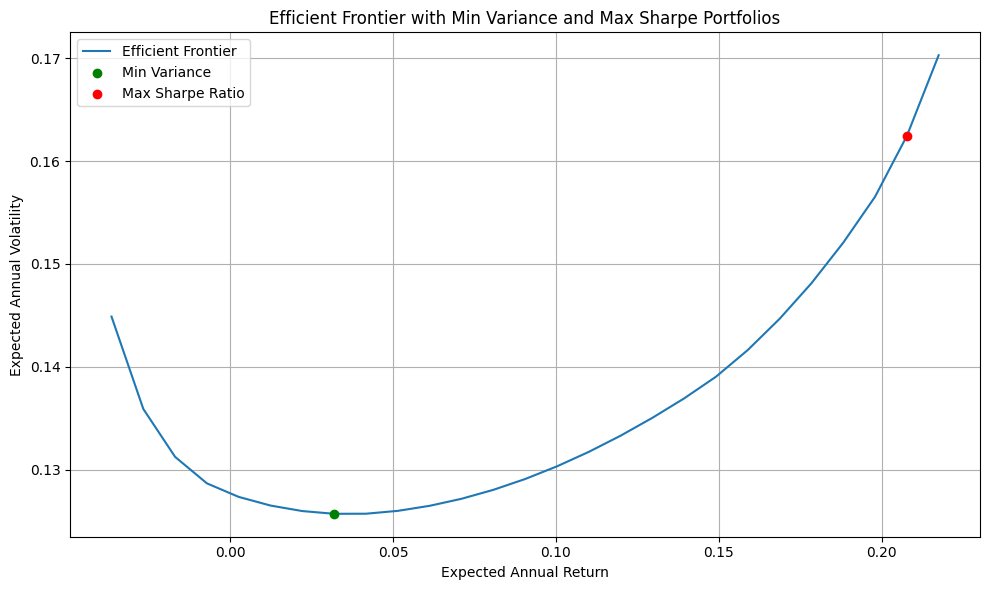


--- Minimum Variance Portfolio Weights ---
AXP: 0.0448
CB: 0.2112
CMG: 0.0819
EA: 0.0310
EBAY: 0.0315
GRMN: 0.0499
IBM: 0.2016
IT: 0.0692
LEG: 0.0805
ORLY: 0.1210
XL: 0.0773

--- Maximum Sharpe Ratio Portfolio Weights ---
AVGO: 0.1358
BAC: 0.1802
CB: 0.1531
EA: 0.1976
MHK: 0.1050
ORLY: 0.2283


In [23]:
# --- Risk-free rate (you can change this if needed) ---
rf = 0.0

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf) / v for r, v in zip(target_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Plot with annotations ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in target_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')

# Mark key points
plt.scatter(target_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252),
            color='green', label='Min Variance', zorder=5)
plt.scatter(target_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252),
            color='red', label='Max Sharpe Ratio', zorder=5)

plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")
